In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('linear_regression_dataset.csv')
df.head()


,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [3]:
df.shape

(500, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [5]:
df.isnull().sum()


AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

In [6]:
df = df.dropna(axis=0)

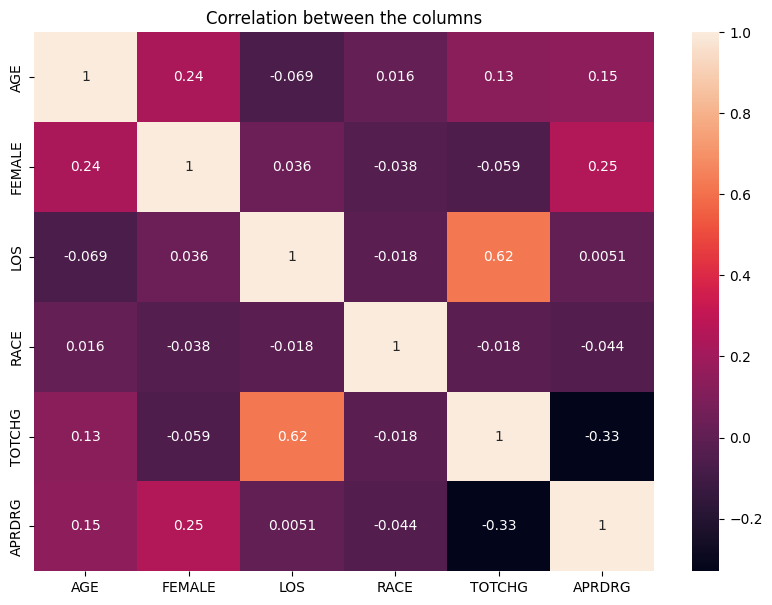

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [8]:
wss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)

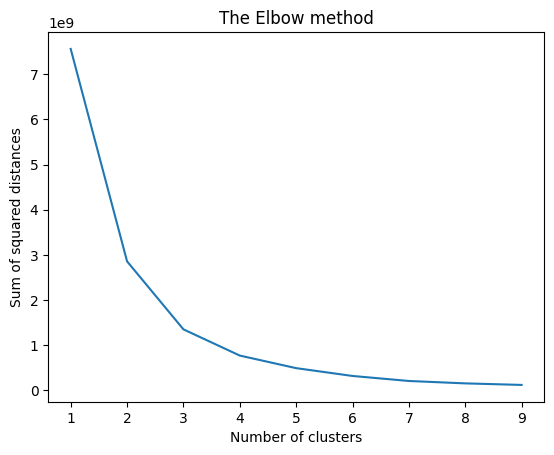

In [9]:
plt.plot(range(1,10), wss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [10]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.8490285812042188
For cluster: 3, the silhouette score is: 0.8398831620446666
For cluster: 4, the silhouette score is: 0.8253807364533282
For cluster: 5, the silhouette score is: 0.6887382386440104
For cluster: 6, the silhouette score is: 0.665146701554233
For cluster: 7, the silhouette score is: 0.6538480093172079
For cluster: 8, the silhouette score is: 0.5586498571154713
For cluster: 9, the silhouette score is: 0.556322562108388


In [11]:
 silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [12]:
# plt.plot(range(2,10), silhouette_coefficients)
# plt.xticks(range(2,10))
# plt.xlabel("number of clusters")
# plt.ylabel("Silhouette coefficient")
# plt.show()

In [13]:
pca = PCA()
X = pca.fit_transform(df)


In [14]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

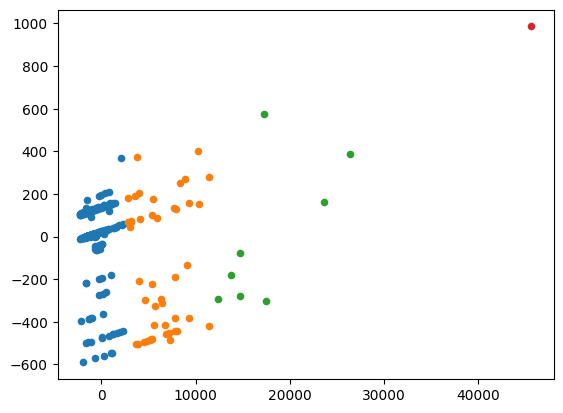

In [15]:
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)